In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sharpy.utils.h5utils as h5utils
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [2]:
S = 32
rho = 1.225
c = 1

In [3]:
def load_forces_and_moments(m, u_inf, sim_type='aeroelastic'):
    forces = np.loadtxt('./nonlinear_output/zero_m{:g}_nonlinforces_{:s}_u{:04g}.txt'.format(m, sim_type, u_inf*10))
    moments = np.loadtxt('./nonlinear_output/zero_m{:g}_nonlinmoments_{:s}_u{:04g}.txt'.format(m, sim_type, u_inf*10))
    
    return forces, moments

def load_stability_derivatives(case_name, sim_type='aeroelastic'):
    with h5py.File('./output/' + case_name + '/derivatives/{:s}_stability_derivatives.h5'.format(sim_type), 'r') as f:
        data = h5utils.load_h5_in_dict(f)
    return data

In [4]:
def plot_forces(forces, qS):
    fig, ax = plt.subplots(ncols=2, figsize=(10, 6))
    ax[0].plot(forces[:, 0] * 180 / np.pi, forces[:, -1] / qS, marker='o')
    ax[1].plot(forces[:, 0] * 180 / np.pi, forces[:, 1] / qS, marker='o')
    
    aoa = forces[:, 0]
    cl = forces[:, -1] / qS
    p = np.polyfit(aoa, cl, deg=1)
    cla = p[0]

    ax[0].set_xlabel('Angle of Attack, deg')
    ax[1].set_xlabel('Angle of Attack, deg')

    ax[0].set_ylabel('Lift Coefficient, $C_L$')
    ax[1].set_ylabel('Drag Coefficient, $C_D$')

    print('Nonlinear CLa: {:.4f} / rad'.format(cla))
    plt.tight_layout()
    return cla

In [5]:
def plot_moments(moments, qS, c):
    plt.plot(moments[:, 0] * 180 / np.pi, moments[:, 2] / qS / c, marker='o')
    cma = (moments[-1, 2] - moments[0, 2]) / qS / c /  (moments[-1, 0] - moments[0, 0])
    aoa = moments[:, 0]
    cm = moments[:, 2] / qS / c
    p = np.polyfit(aoa, cm, deg=1)
    cma = p[0]
    plt.xlabel('Angle of Attack, deg')
    plt.ylabel('Pitching Moment Coefficient, $C_M$')
    print('Nonlinear CMa: {:.4f} / rad'.format(cma))

# Aerodynamic Example Case

In [6]:
m = 4
u_inf = 6

linear_case_name = 'hale_static_m{:g}_uinf{:g}_rm_ct'.format(m, u_inf)
qS = 0.5 * rho * u_inf ** 2 * S

forces, moments = load_forces_and_moments(m, u_inf, 'aerodynamic')
linear_derivatives = load_stability_derivatives(linear_case_name, 'aerodynamic')

Nonlinear CLa: 5.9495 / rad
Linear CLa = 5.9927 / rad


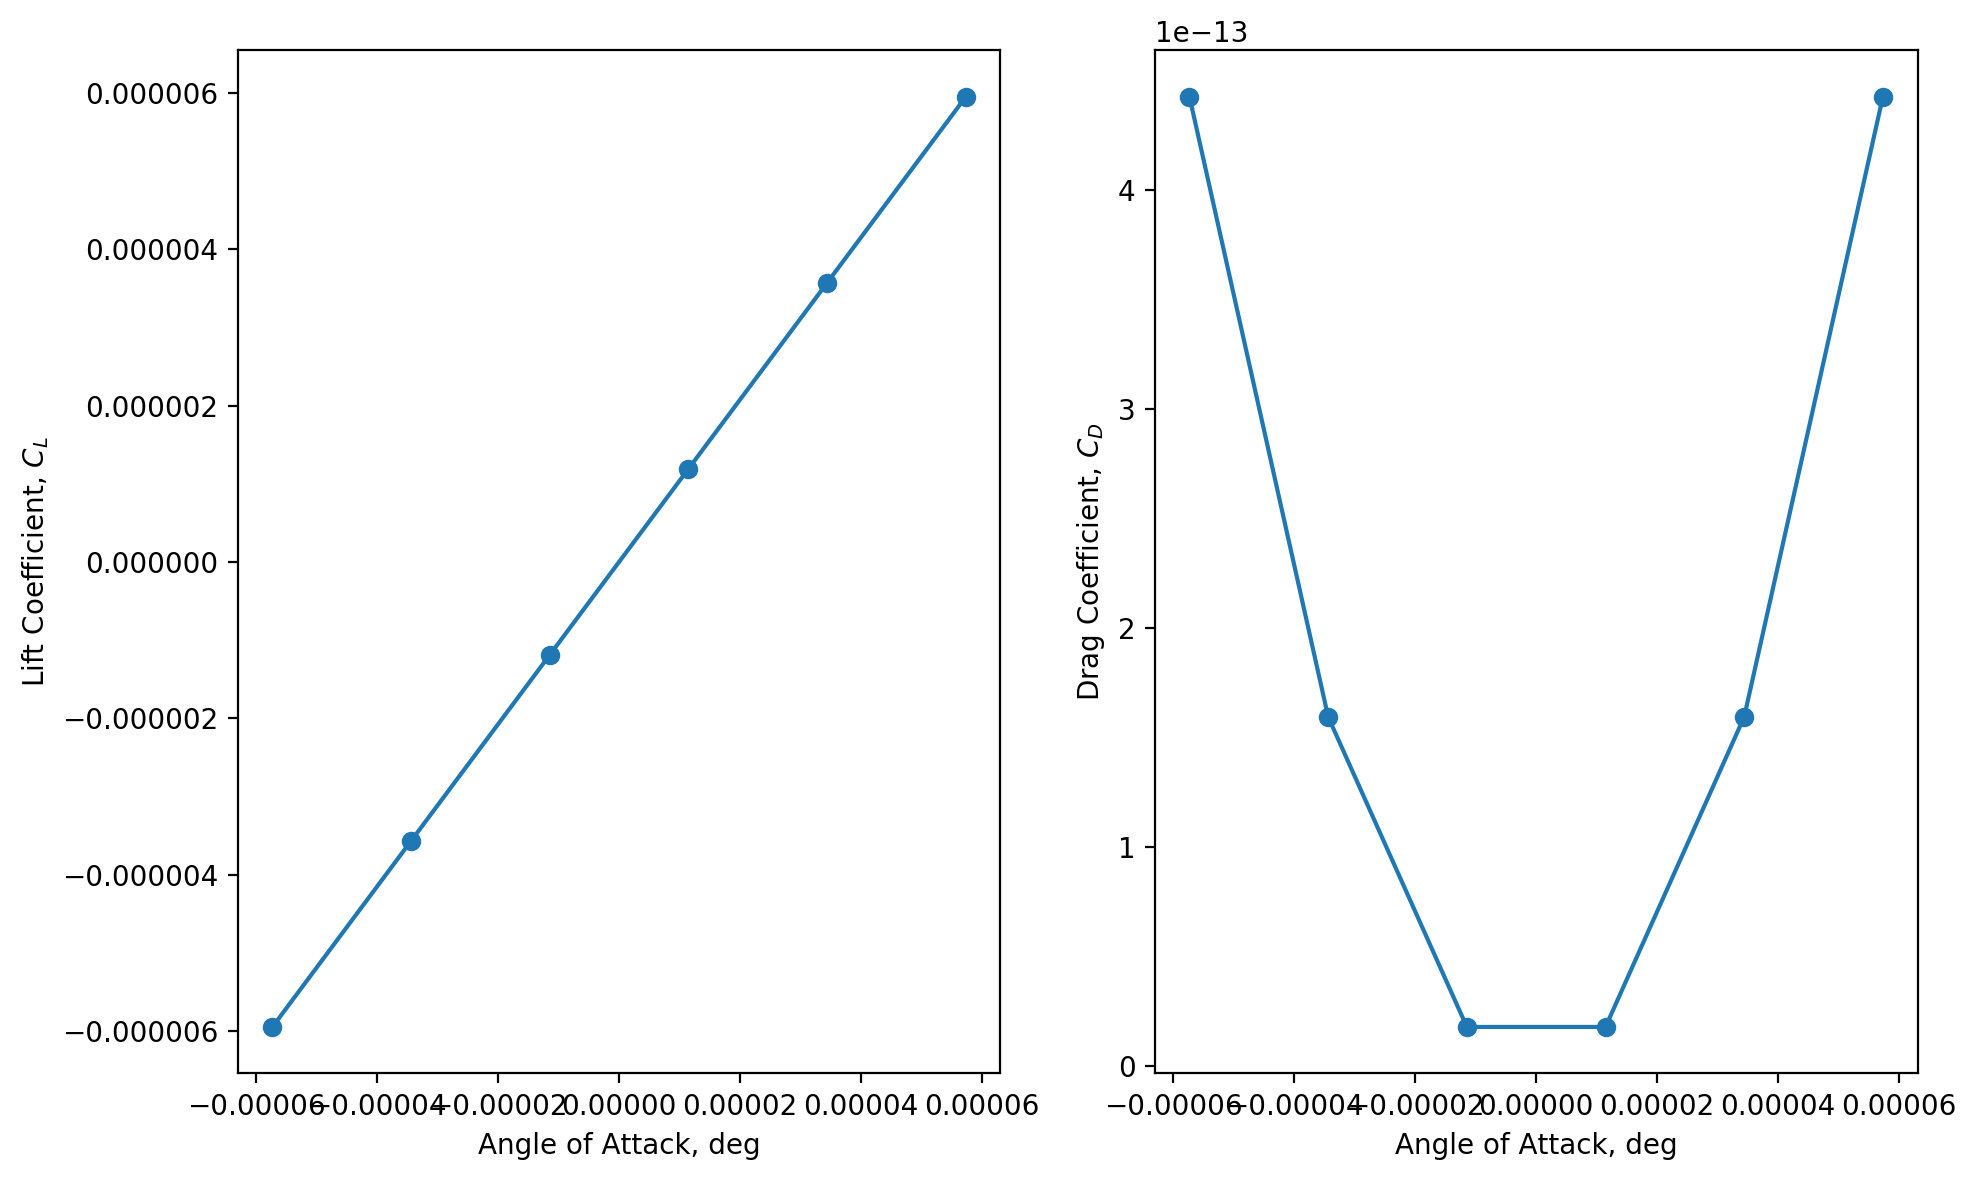

In [7]:
plot_forces(forces, qS)
print('Linear CLa = {:.4f} / rad'.format(linear_derivatives['force_angle_velocity'][2, 1]))

Nonlinear CMa: -3.1608 / rad
Linear CMa = -3.2476 / rad


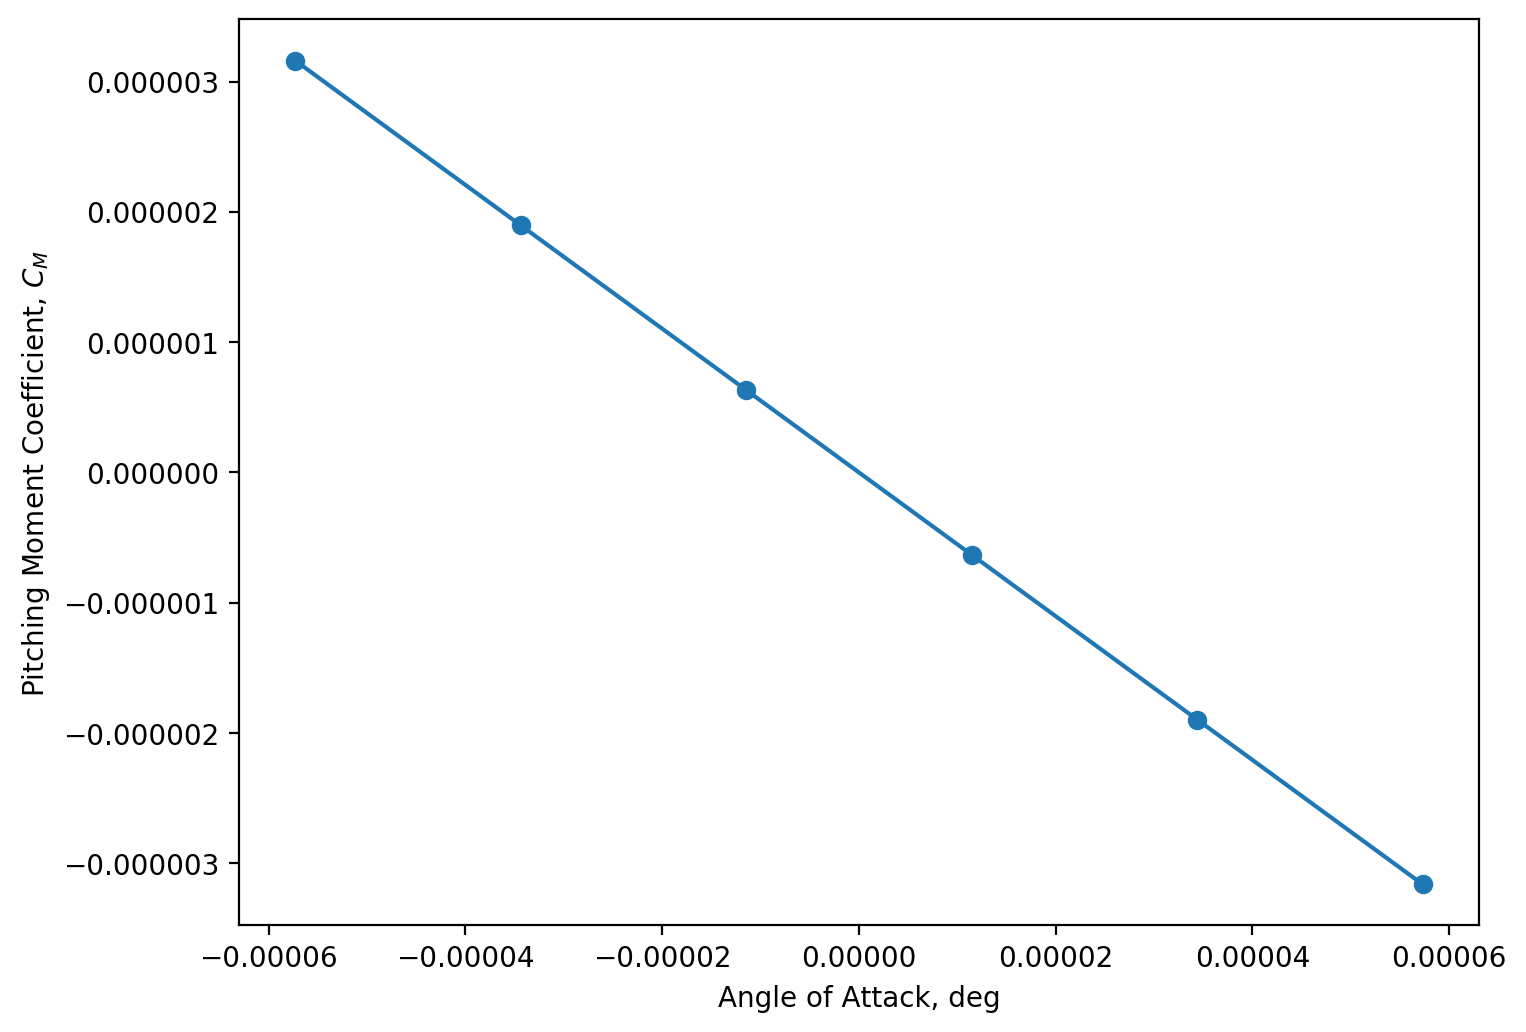

In [8]:
plot_moments(moments, qS, c)
print('Linear CMa = {:.4f} / rad'.format(linear_derivatives['force_angle_velocity'][4, 1]))